**Load and Explore the Data**

In [26]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:

# Step 1: Load the data
file_path = 'Distillation Column Dataset.xlsx'
df = pd.read_excel(file_path)

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()

# Check for missing values
df.isnull().sum()

# Display summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            961 non-null    int64  
 1   Sensor1         961 non-null    float64
 2   Sensor2         961 non-null    float64
 3   Sensor3         961 non-null    float64
 4   Sensor4         961 non-null    float64
 5   Sensor5         961 non-null    float64
 6   Sensor6         961 non-null    float64
 7   Sensor7         961 non-null    float64
 8   Sensor8         961 non-null    float64
 9   Sensor9         961 non-null    float64
 10  Sensor10        961 non-null    float64
 11  Sensor11        961 non-null    float64
 12  Sensor12        961 non-null    float64
 13  Sensor13        961 non-null    float64
 14  Sensor14        961 non-null    float64
 15  Sensor15        961 non-null    float64
 16  Sensor16        961 non-null    int64  
 17  MoleFractionTX  961 non-null    flo

Time     Sensor1     Sensor2     Sensor3      Sensor4  \
count    961.000000  961.000000  961.000000  961.000000   961.000000   
mean   14400.000000   49.994889  101.279649   49.555769  3823.335379   
std     8326.833132    0.292281    0.452364    6.118368   511.213382   
min        0.000000   48.907668   97.702103   36.812829  3004.403494   
25%     7200.000000   49.754926  101.033896   44.564921  3408.090531   
50%    14400.000000   50.001056  101.296977   50.455106  3722.752040   
75%    21600.000000   50.225012  101.539019   54.766717  4450.433352   
max    28800.000000   50.807513  103.848213   57.890626  4562.816420   

           Sensor5      Sensor6      Sensor7     Sensor8       Sensor9  \
count   961.000000   961.000000   961.000000  961.000000  9.610000e+02   
mean   6865.768293  2805.781415  1053.164047    0.055029  5.010010e-01   
std     755.410384   259.579392     4.997380    0.003787  1.133017e-14   
min    5653.363002  2134.576770  1013.589114    0.028320  5.010010e-01   
25%    6252.664563  2601.983148  1049.884770    0.053854  5.010010e-01   
50%    6718.275361  2756.461191  1053.220322    0.054807  5.010010e-01   
75%    7406.035409  3111.691346  1055.451884    0.056485  5.010010e-01   
max    7957.048708  3300.394030  1084.786368    0.084926  5.010010e-01   

           Sensor10    Sensor11    Sensor12    Sensor13    Sensor14  \
count  9.610000e+02  961.000000  961.000000  961.000000  961.000000   
mean   4.989990e-01   76.835812  104.424765  110.492765   67.313865   
std    1.116355e-14    0.334343    0.280159    0.280159    0.280159   
min    4.989990e-01   75.991528  103.930595  109.998595   66.819695   
25%    4.989990e-01   76.601021  104.183922  110.251922   67.073022   
50%    4.989990e-01   76.832795  104.426582  110.494582   67.315682   
75%    4.989990e-01   77.085614  104.649155  110.717155   67.538255   
max    4.989990e-01   77.891430  104.929458  110.997458   67.818558   

         Sensor15  Sensor16  MoleFractionTX  MoleFractionHX  
count  961.000000     961.0      961.000000      961.000000  
mean     0.809068       0.0        0.964015        0.035985  
std      0.161491       0.0        0.008473        0.008473  
min      0.571794       0.0        0.950885        0.022401  
25%      0.639547       0.0        0.957287        0.028810  
50%      0.807521       0.0        0.965902        0.034098  
75%      0.914706       0.0        0.971190        0.042713  
max      1.644580       0.0        0.977599        0.049115

**Data Cleaning and Preprocessing**

In [28]:
# Step 2: Data Cleaning

# Drop columns with constant values (as they don't contribute to the model)
columns_to_drop = ['Sensor9', 'Sensor10', 'Sensor16']
df = df.drop(columns=columns_to_drop, axis=1)

# Rename columns for better readability (optional)
column_rename_map = {
    'Sensor1': 'Liquid%inCondensor',
    'Sensor2': 'Condenser_Pressure',
    'Sensor3': 'Liquid%inReboiler',
    'Sensor4': 'Mass_Flow_Rate_in_Feed_Flow',
    'Sensor5': 'Mass_Flow_Rate_in_Top_outlet_stream',
    'Sensor6': 'Net_Mass_Flow_in_main_tower',
    'Sensor7': 'Mole Fraction HX at reboiler',
    'Sensor8': 'HX Mole Fraction in Top Outler Stream',
    'Sensor11': 'Feed_Tray_Temp',
    'Sensor12': 'Main_Tower_Pressure',
    'Sensor13': 'Bottom Tower Pressure',
    'Sensor14': 'Top Tower Pressure',
    'Sensor15': 'Reflux_Ratio'
}
df.rename(columns=column_rename_map, inplace=True)

# Verify changes
df.head()


Time  Liquid%inCondensor  Condenser_Pressure  Liquid%inReboiler  \
0     0           49.718959          101.414959          49.718959   
1    30           49.561845          100.962045          49.541545   
2    60           50.189365          101.490865          50.145165   
3    90           50.183496          101.403296          50.142796   
4   120           50.428793          101.603693          50.406093   

   Mass_Flow_Rate_in_Feed_Flow  Mass_Flow_Rate_in_Top_outlet_stream  \
0                  3693.858959                          6695.368959   
1                  3712.947045                          6629.637045   
2                  3718.008865                          6692.598865   
3                  3721.819296                          6702.869296   
4                  3724.444693                          6710.444693   

   Net_Mass_Flow_in_main_tower  Mole Fraction HX at reboiler  \
0                  2924.818959                   1048.588959   
1                  2767.487045                   1046.987045   
2                  2763.018865                   1050.988865   
3                  2754.009296                   1051.449296   
4                  2744.244693                   1052.674693   

   HX Mole Fraction in Top Outler Stream  Feed_Tray_Temp  Main_Tower_Pressure  \
0                               0.054394       76.803959           104.148959   
1                               0.054233       76.437645           103.977045   
2                               0.053941       77.041465           104.608865   
3                               0.053968       77.016096           104.609296   
4                               0.054121       77.252293           104.864693   

   Bottom Tower Pressure  Top Tower Pressure  Reflux_Ratio  MoleFractionTX  \
0             110.216959           67.038059      0.798463        0.966281   
1             110.045045           66.866145      0.800811        0.965788   
2             110.676865           67.497965      0.803544        0.965758   
3             110.677296           67.498396      0.807065        0.965756   
4             110.932693           67.753793      0.811774        0.965784   

   MoleFractionHX  
0        0.033719  
1        0.034212  
2        0.034242  
3        0.034244  
4        0.034216

**Define Sensors and Target**

In [29]:
# Define the sensors and target properties
sensors = ['Liquid%inCondensor', 'Condenser_Pressure', 'Liquid%inReboiler', 'Mass_Flow_Rate_in_Feed_Flow', 'Mass_Flow_Rate_in_Top_outlet_stream', 'Net_Mass_Flow_in_main_tower','Mole Fraction HX at reboiler','HX Mole Fraction in Top Outler Stream', 'Feed_Tray_Temp', 'Main_Tower_Pressure','Bottom Tower Pressure','Top Tower Pressure','Reflux_Ratio']
target_properties = [ 'MoleFractionHX','MoleFractionTX']


**Plot Time Series for Each Sensor**

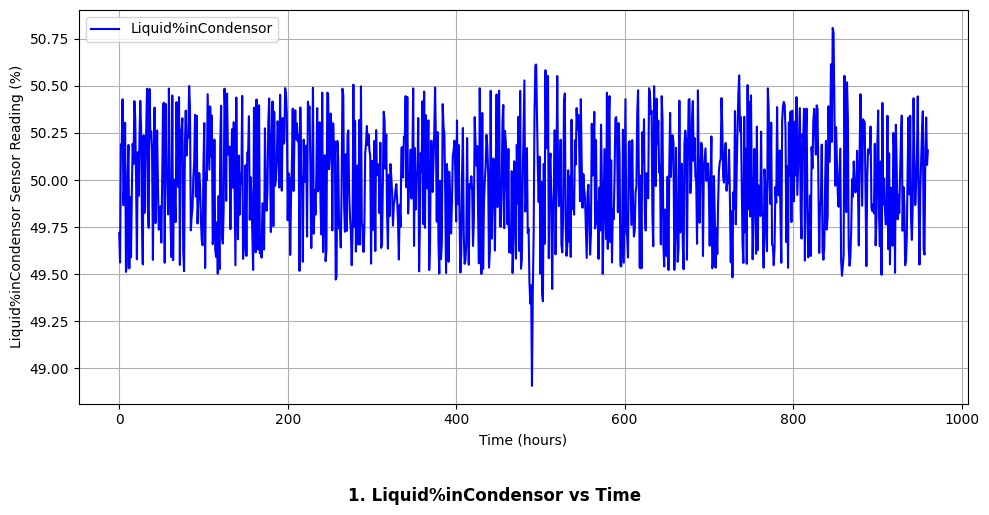

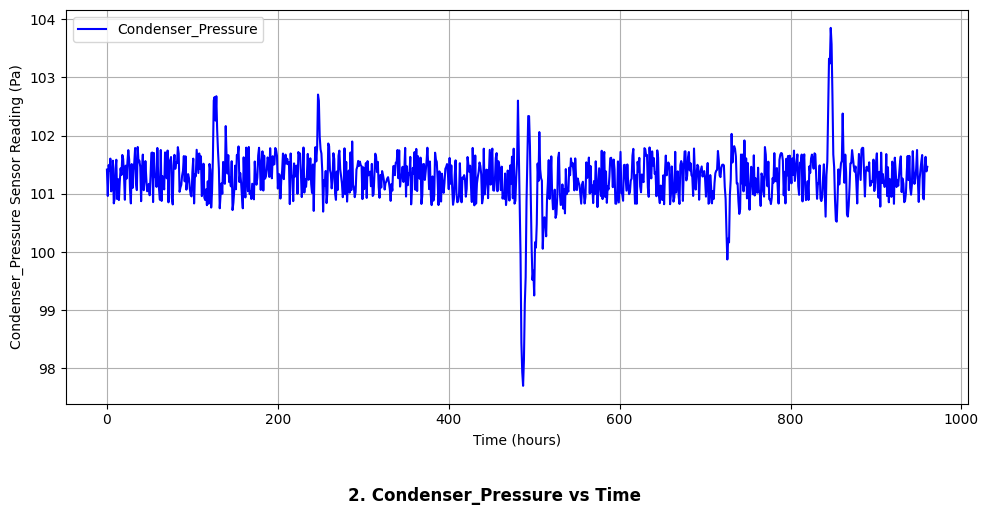

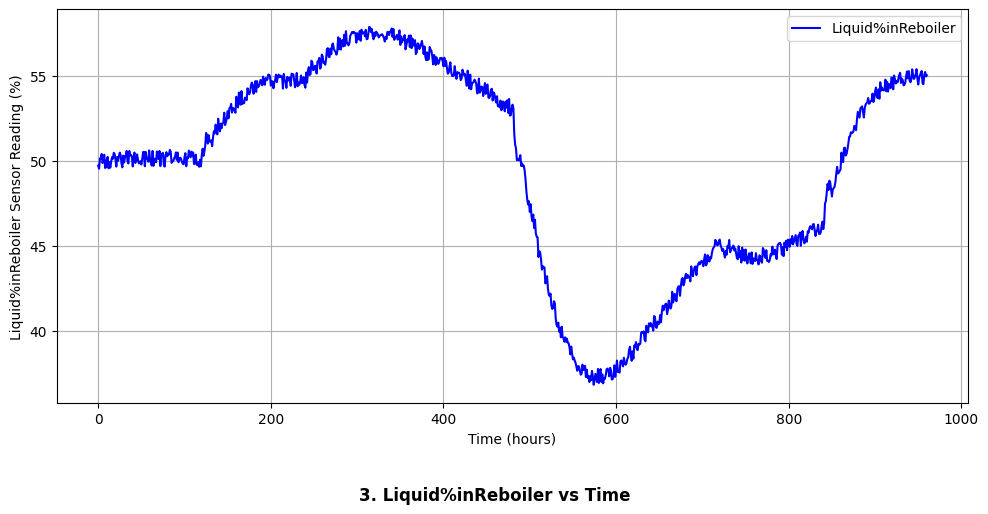

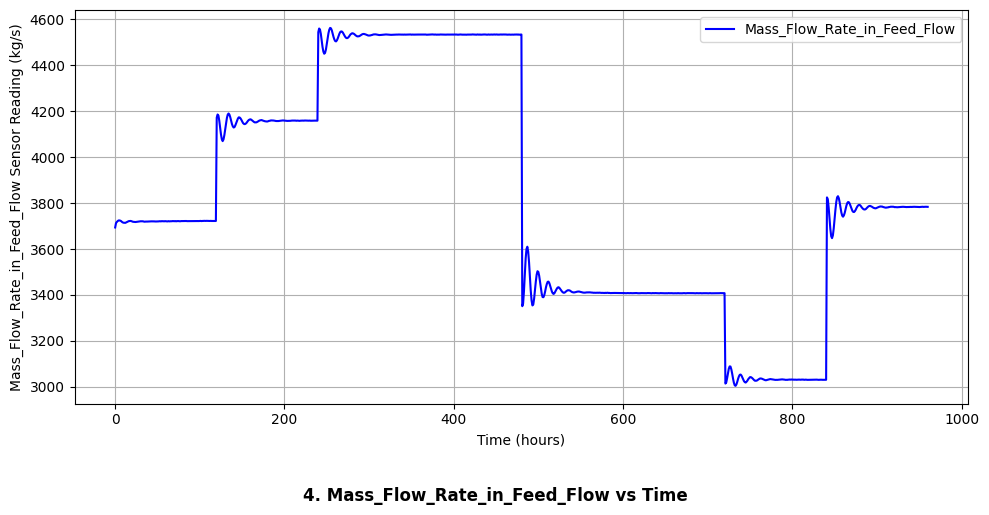

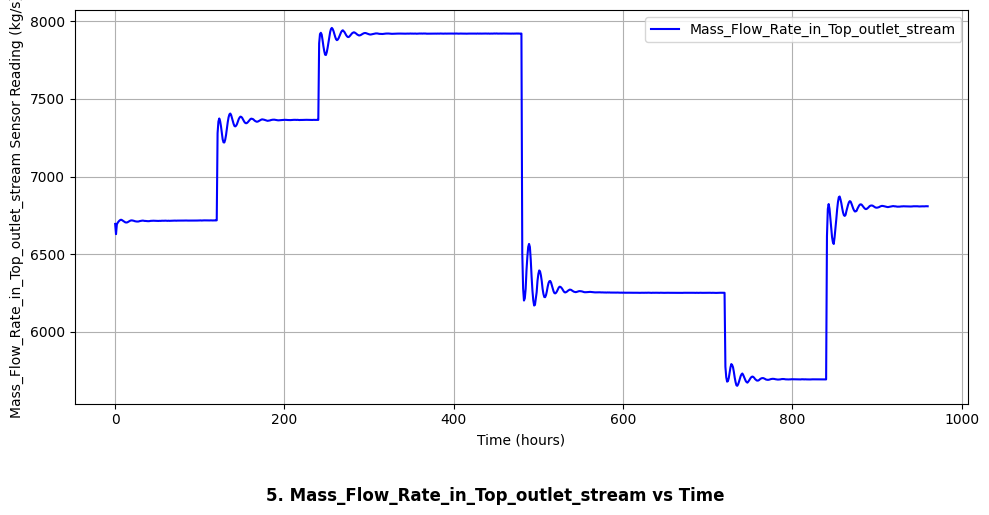

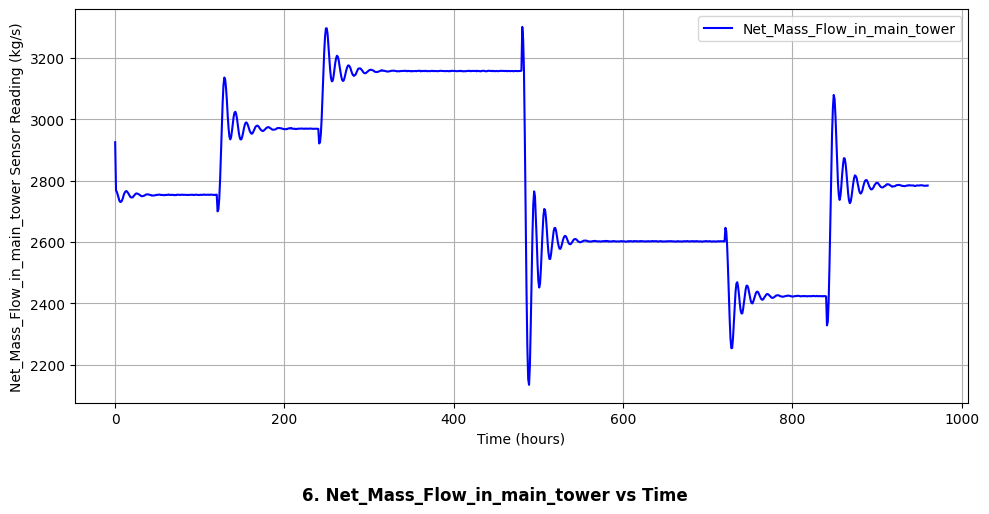

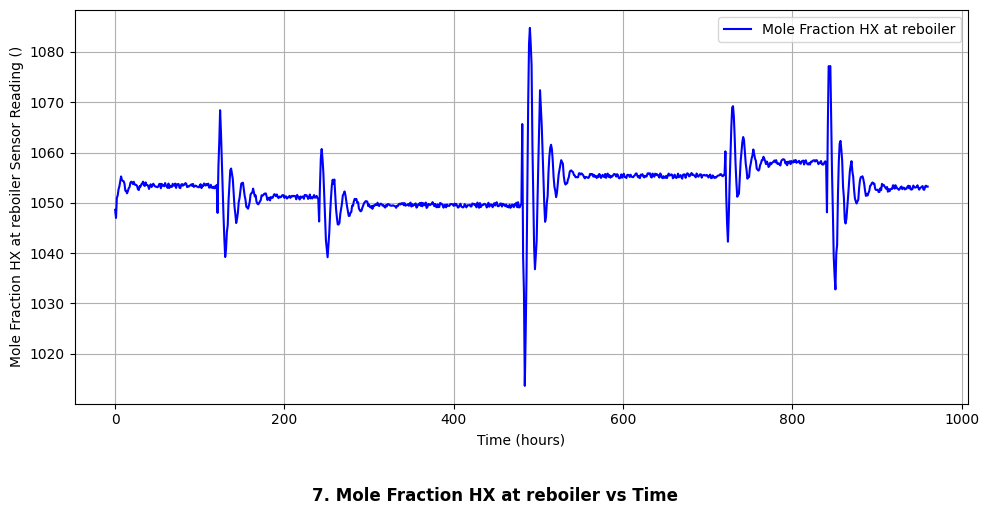

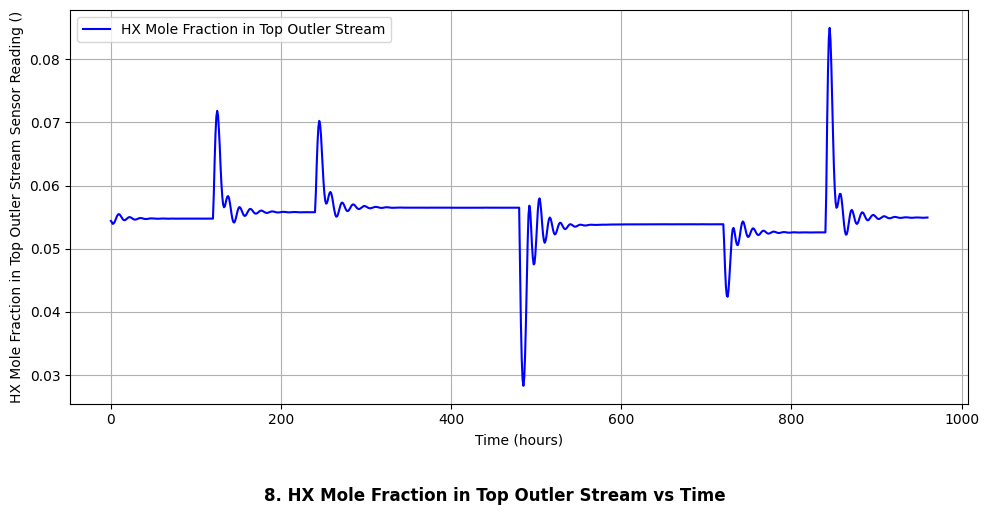

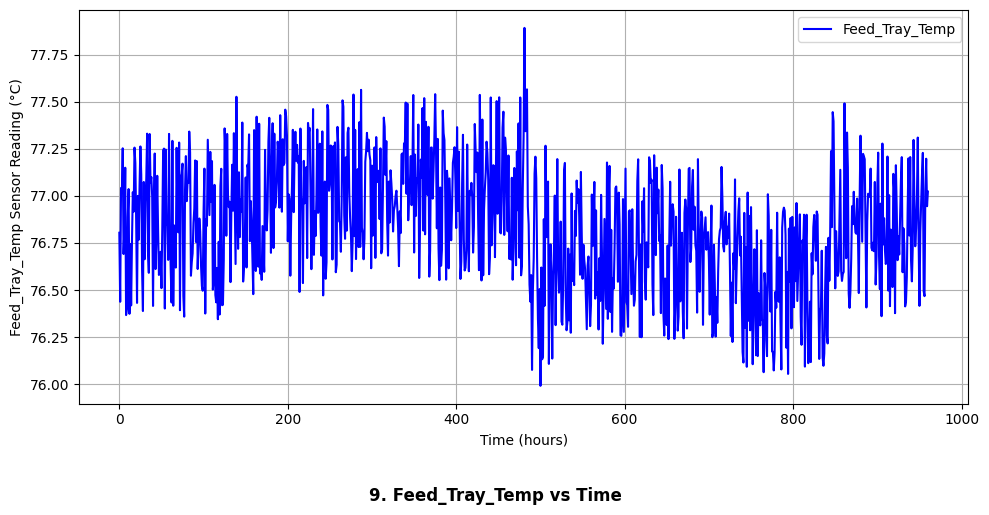

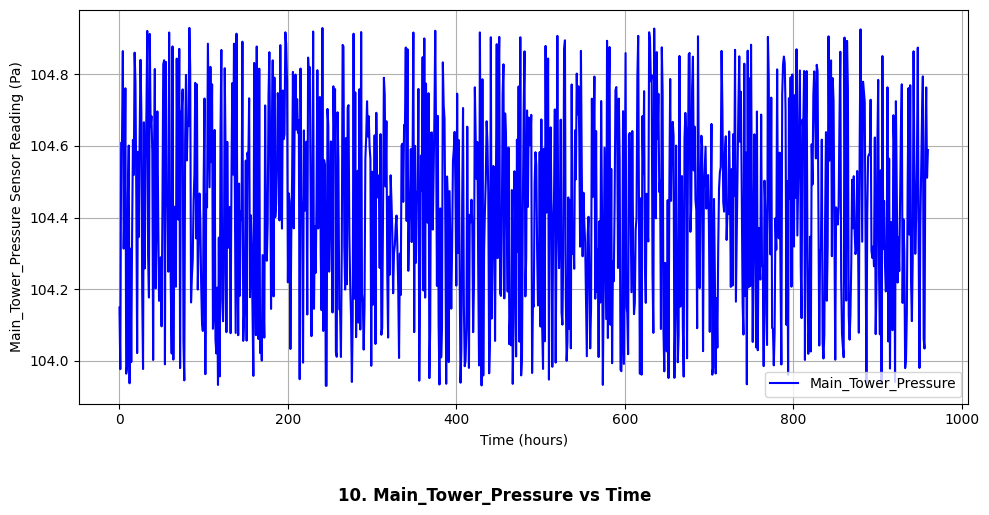

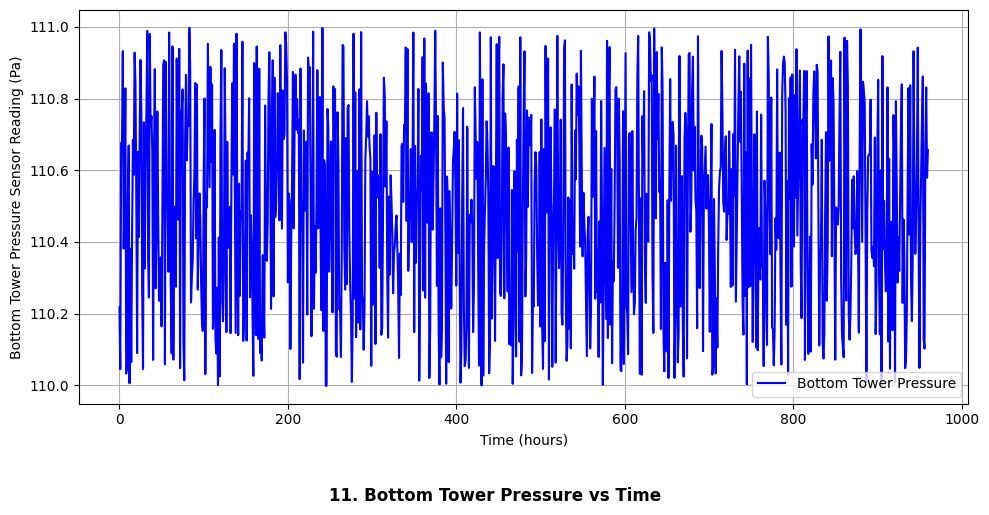

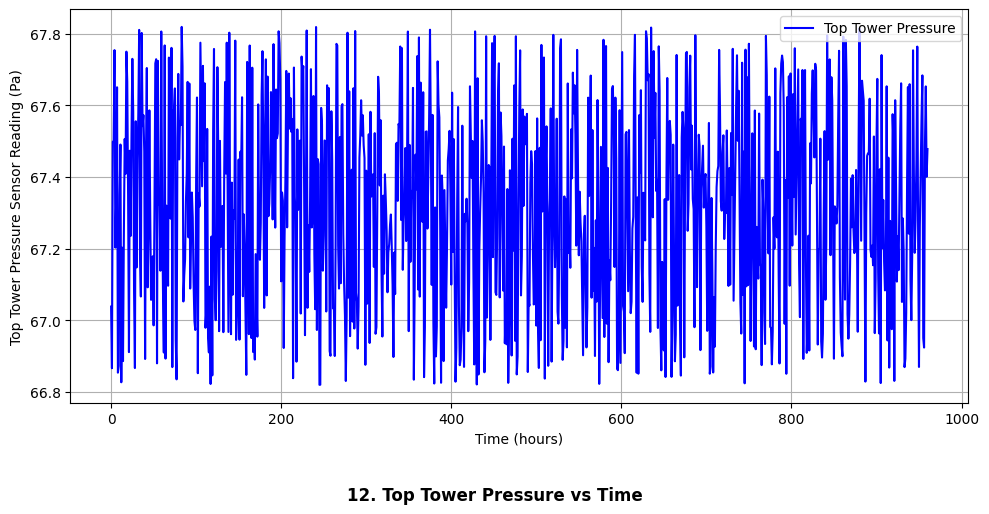

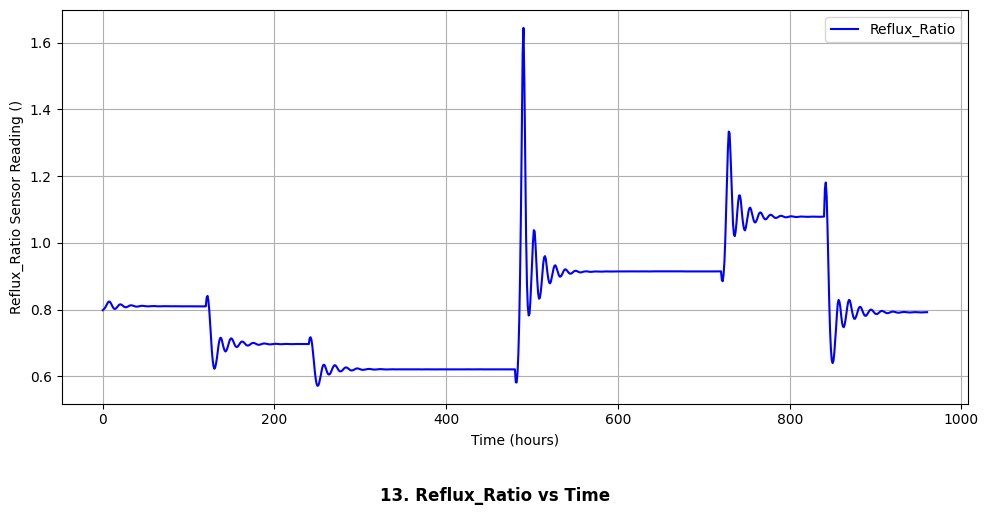

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to hold units for each sensor, including the new sensors
units = {
    'Liquid%inCondensor': '%',
    'Condenser_Pressure': 'Pa',  # Assuming pressure in Pascals
    'Liquid%inReboiler': '%',
    'Mass_Flow_Rate_in_Feed_Flow': 'kg/s',
    'Mass_Flow_Rate_in_Top_outlet_stream': 'kg/s',
    'Net_Mass_Flow_in_main_tower': 'kg/s',
    'Feed_Tray_Temp': '°C',  # Assuming temperature in Celsius
    'Main_Tower_Pressure': 'Pa',  # Assuming pressure in Pascals
    'Mole Fraction HX at reboiler': '',
    'HX Mole Fraction in Top Outler Stream': '',
    'Bottom Tower Pressure': 'Pa',
    'Top Tower Pressure': 'Pa',
    'Reflux_Ratio': ''
}

# Updated list of sensors including the new ones
sensors = ['Liquid%inCondensor', 'Condenser_Pressure', 'Liquid%inReboiler',
           'Mass_Flow_Rate_in_Feed_Flow', 'Mass_Flow_Rate_in_Top_outlet_stream',
           'Net_Mass_Flow_in_main_tower', 'Mole Fraction HX at reboiler',
           'HX Mole Fraction in Top Outler Stream', 'Feed_Tray_Temp',
           'Main_Tower_Pressure', 'Bottom Tower Pressure', 'Top Tower Pressure',
           'Reflux_Ratio']

# Plotting the time series for each sensor with units and numbering the graphs
for i, sensor in enumerate(sensors, start=1):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[sensor], label=sensor, color='blue')
    plt.xlabel('Time (hours)')  # Assuming time is in hours, adjust if necessary
    plt.ylabel(f'{sensor} Sensor Reading ({units.get(sensor, "")})')  # Use dictionary for units

    # Add grid and legend
    plt.grid(True)
    plt.legend()

    # Title formatting and placement below the plot
    plt.suptitle(f'{i}. {sensor} vs Time', y=-0.05, fontweight='bold')  # Adjusted 'y' value for title placement
    plt.tight_layout()  # To ensure everything fits well within the plot area
    plt.show()


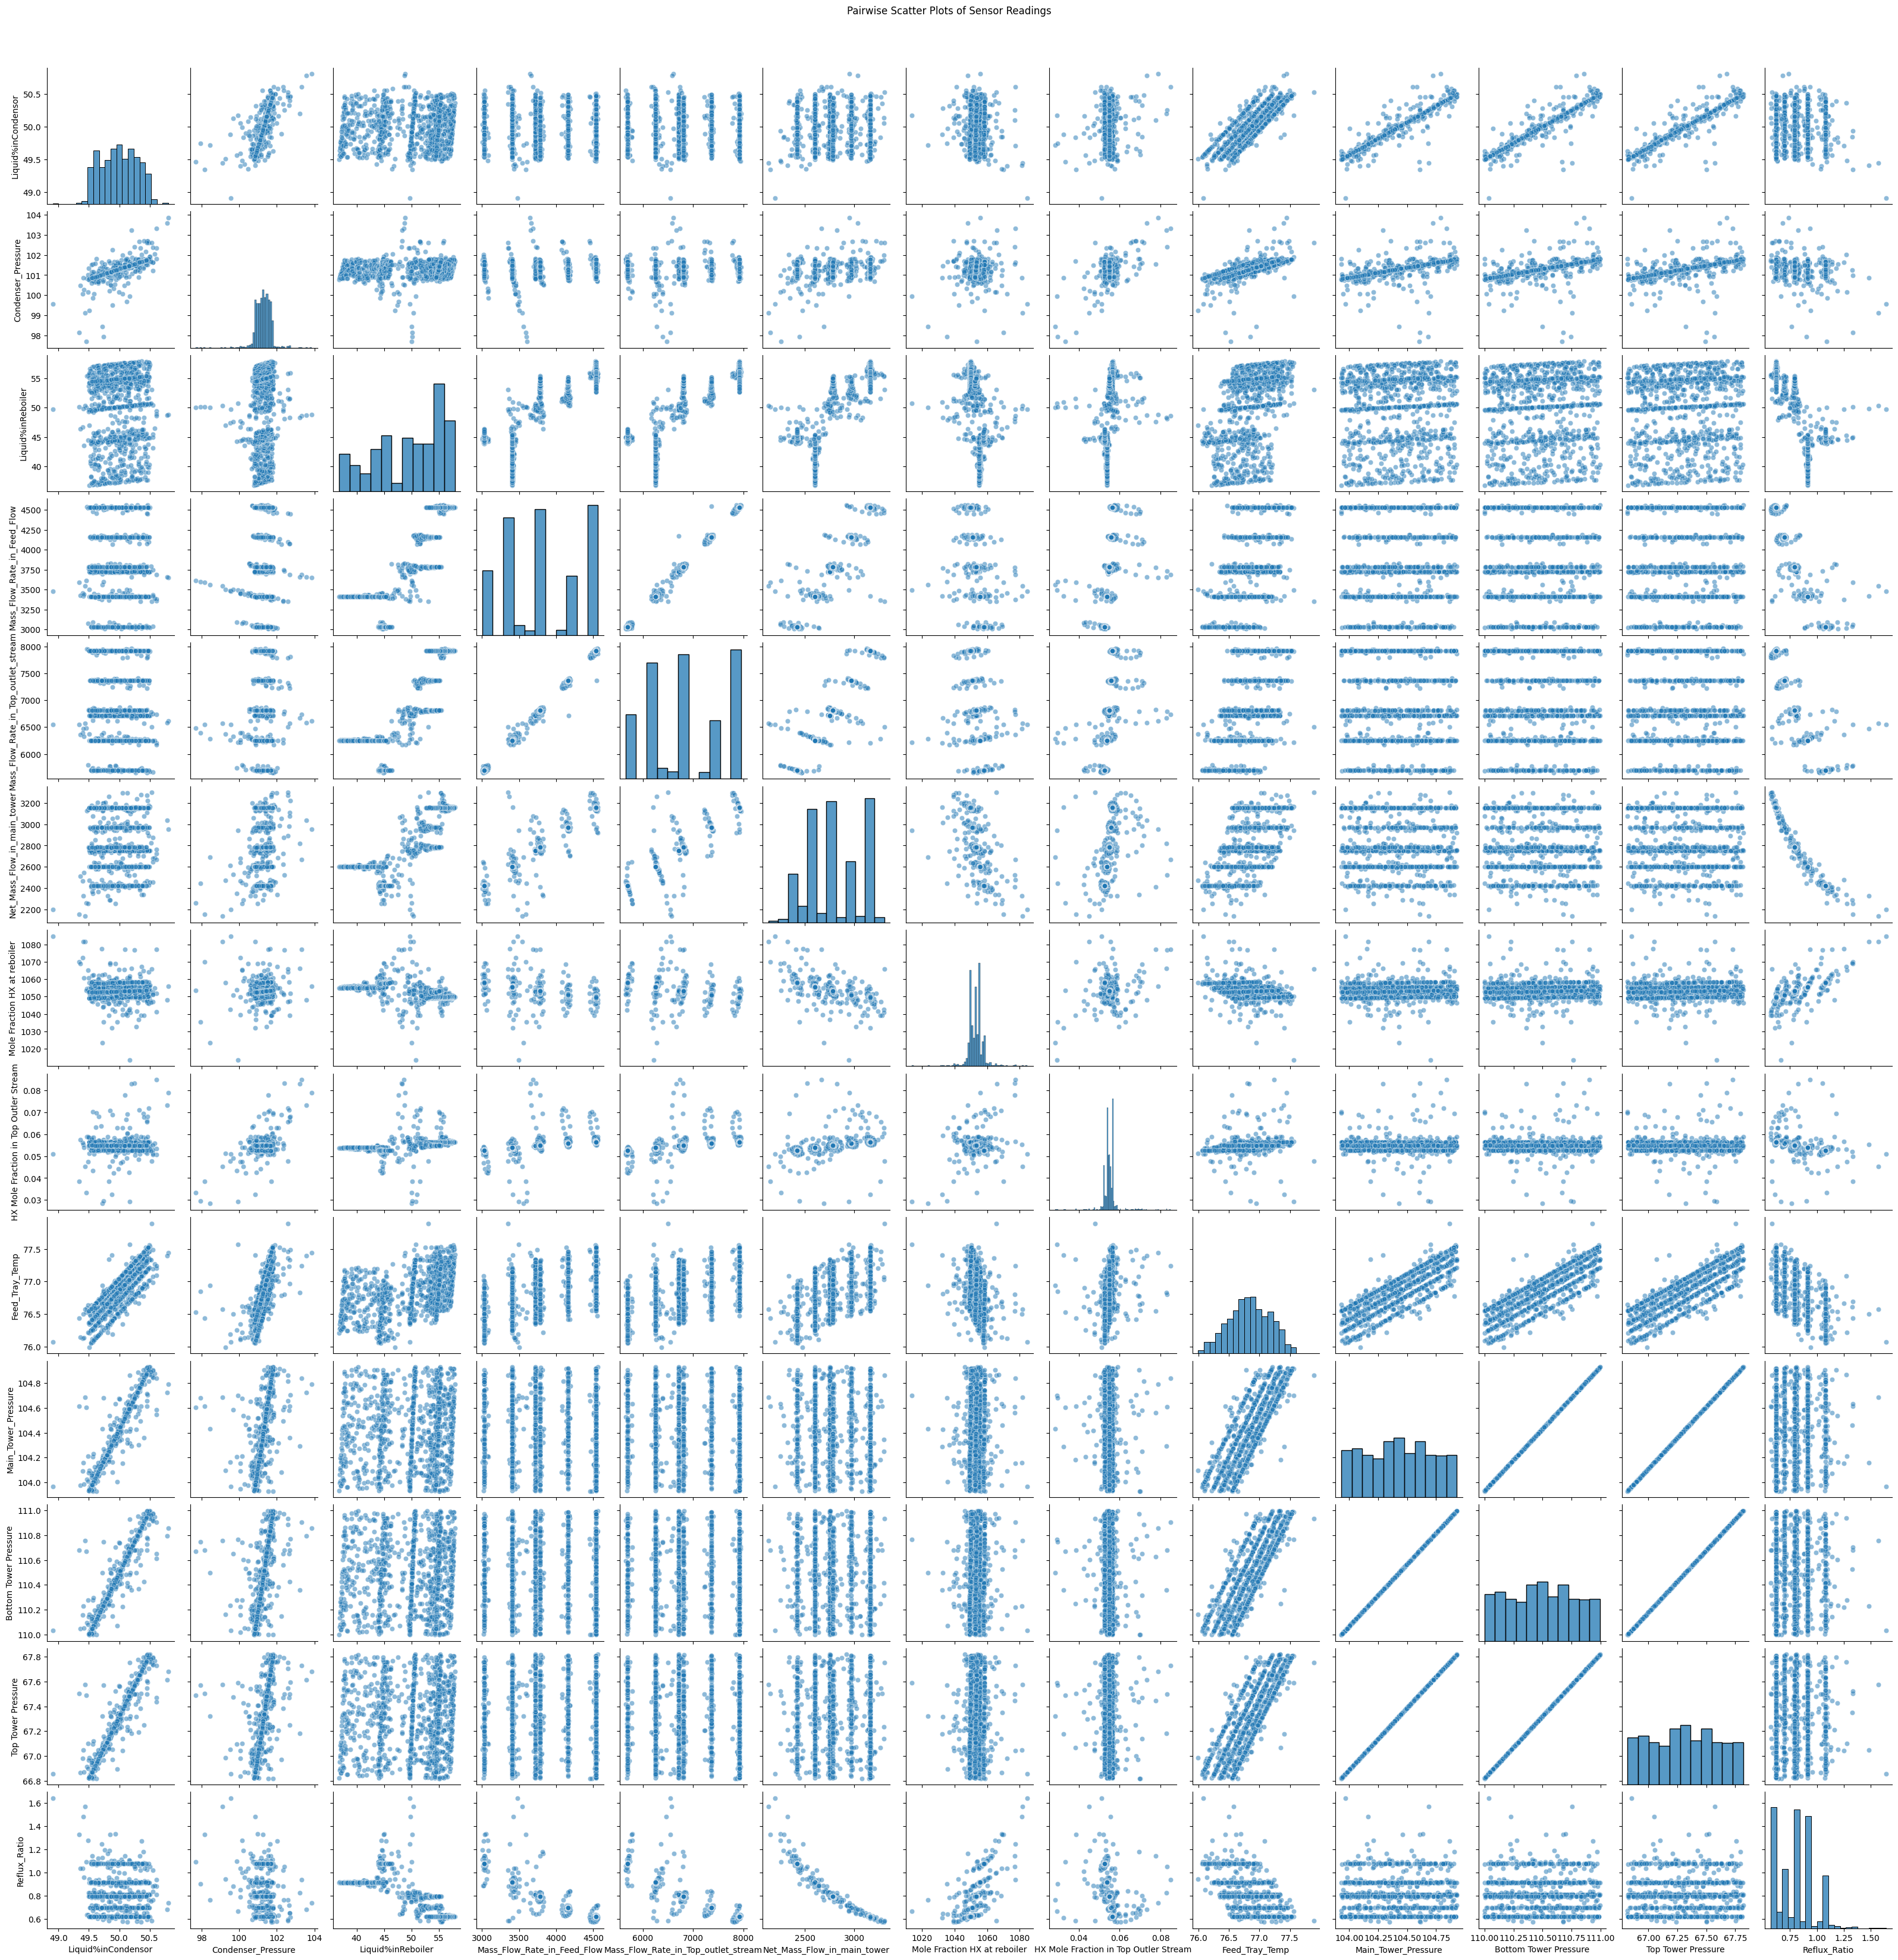

In [31]:
sns.pairplot(df[sensors], kind='scatter', diag_kind='hist', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Scatter Plots of Sensor Readings', y=1.02)
plt.show()

**Correlation Matrix Heatmap**

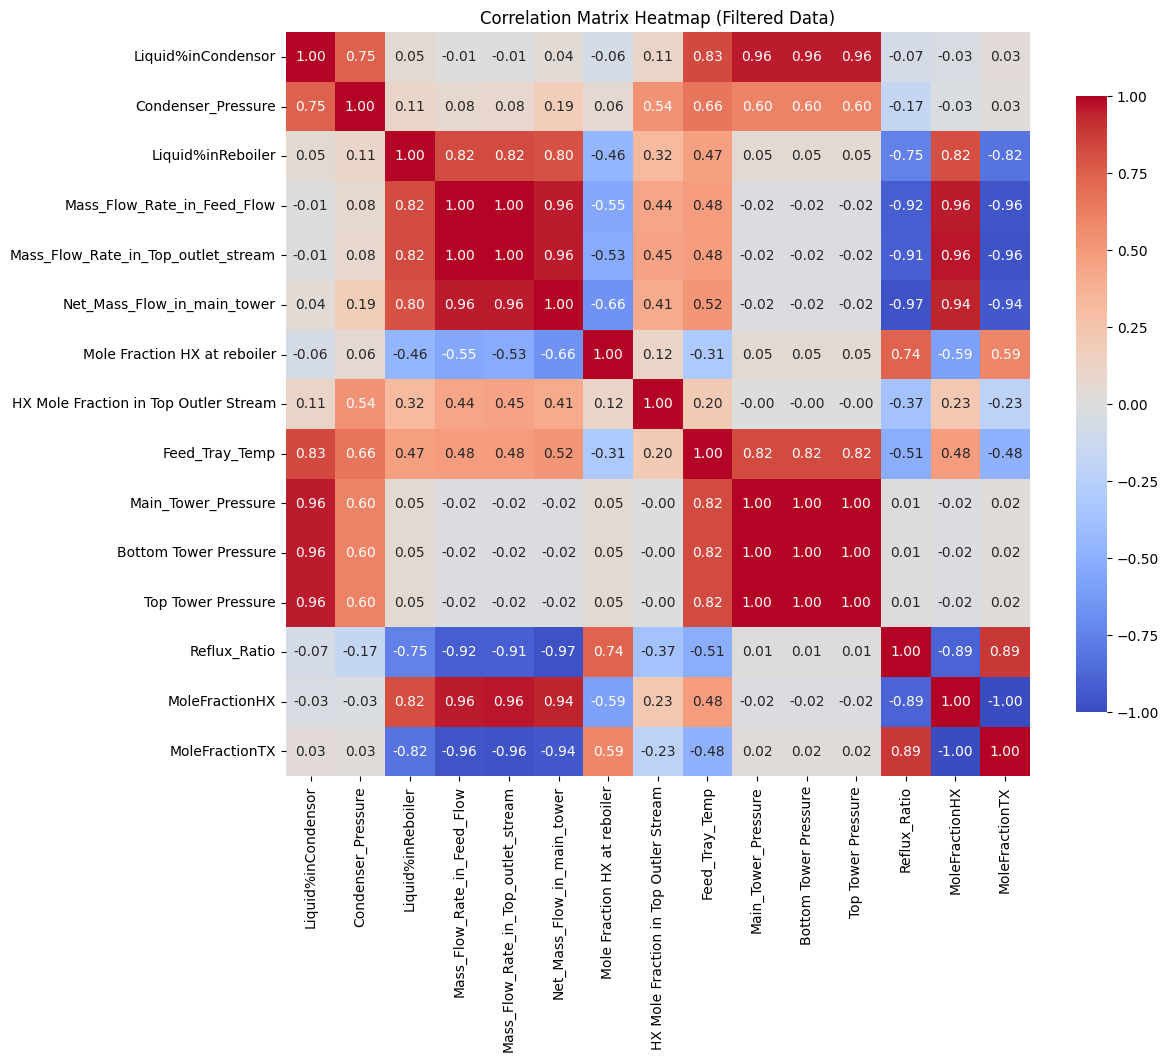

In [32]:

correlation_matrix = df[sensors + target_properties].corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display values in each cell
    cmap='coolwarm',
    fmt='.2f',  # Format for displaying values
    square=True,
    cbar_kws={"shrink": 0.8},  # Color bar settings
    vmin=-1, vmax=1  # Optional: Sets limits for color scale for better visualization
)
plt.title('Correlation Matrix Heatmap (Filtered Data)')
plt.show()

**Define Features and Targets**

In [33]:
X = df.drop(columns=['MoleFractionTX', 'MoleFractionHX'])
y_TX = df['MoleFractionTX']
y_HX = df['MoleFractionHX']


**Train-Test Split**

In [34]:
X_train, X_test, y_TX_train, y_TX_test, y_HX_train, y_HX_test = train_test_split(X, y_TX, y_HX, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Define Features and Targets**

In [35]:

target_scaler = StandardScaler()
y_TX_train_scaled = target_scaler.fit_transform(y_TX_train.values.reshape(-1, 1))
y_TX_test_scaled = target_scaler.transform(y_TX_test.values.reshape(-1, 1))
y_HX_train_scaled = target_scaler.fit_transform(y_HX_train.values.reshape(-1, 1))
y_HX_test_scaled = target_scaler.transform(y_HX_test.values.reshape(-1, 1))


**Model 1 - RandomForestRegressor (Training and Evaluation)**

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# RandomForest for MoleFractionTX
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_TX_train)
y_TX_pred_rf = rf.predict(X_test_scaled)
TX_r2_rf = r2_score(y_TX_test, y_TX_pred_rf)

print(f"RandomForest Model for MoleFractionTX R^2: {TX_r2_rf}")

# RandomForest for MoleFractionHX
rf_HX = RandomForestRegressor(n_estimators=100, random_state=42)
rf_HX.fit(X_train_scaled, y_HX_train)
y_HX_pred_rf = rf_HX.predict(X_test_scaled)
HX_r2_rf = r2_score(y_HX_test, y_HX_pred_rf)

print(f"RandomForest Model for MoleFractionHX R^2: {HX_r2_rf}")


RandomForest Model for MoleFractionTX R^2: 0.9952671511941249
RandomForest Model for MoleFractionHX R^2: 0.995018889996827


**Model 2 - LinearRegression (Training and Evaluation)**

In [37]:
from sklearn.linear_model import LinearRegression

# Linear Regression for MoleFractionTX
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_TX_train)
y_TX_pred_lin = lin_reg.predict(X_test_scaled)
TX_r2_lin = r2_score(y_TX_test, y_TX_pred_lin)

print(f"Linear Regression Model for MoleFractionTX R^2: {TX_r2_lin}")

# Linear Regression for MoleFractionHX
lin_reg_HX = LinearRegression()
lin_reg_HX.fit(X_train_scaled, y_HX_train)
y_HX_pred_lin = lin_reg_HX.predict(X_test_scaled)
HX_r2_lin = r2_score(y_HX_test, y_HX_pred_lin)

print(f"Linear Regression Model for MoleFractionHX R^2: {HX_r2_lin}")


Linear Regression Model for MoleFractionTX R^2: 0.9945232072829409
Linear Regression Model for MoleFractionHX R^2: 0.9945236719150263


**Model 3 - K-Nearest Neighbors Regressor (Training and Evaluation)**

In [38]:
from sklearn.neighbors import KNeighborsRegressor

# KNN Regressor for MoleFractionTX
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_TX_train)
y_TX_pred_knn = knn.predict(X_test_scaled)
TX_r2_knn = r2_score(y_TX_test, y_TX_pred_knn)

print(f"KNN Regressor Model for MoleFractionTX R^2: {TX_r2_knn}")

# KNN Regressor for MoleFractionHX
knn_HX = KNeighborsRegressor(n_neighbors=5)
knn_HX.fit(X_train_scaled, y_HX_train)
y_HX_pred_knn = knn_HX.predict(X_test_scaled)
HX_r2_knn = r2_score(y_HX_test, y_HX_pred_knn)

print(f"KNN Regressor Model for MoleFractionHX R^2: {HX_r2_knn}")


KNN Regressor Model for MoleFractionTX R^2: 0.9736360628750981
KNN Regressor Model for MoleFractionHX R^2: 0.9736363170192759


**Model 4- Neural Network Model**

In [39]:
# Define a simple neural network model for regression
def build_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')  # Linear activation for regression output
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model
# Build and train a neural network model for MoleFractionTX
model_tx = build_nn_model(X_train_scaled.shape[1])
model_tx.fit(X_train_scaled, y_TX_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Build and train a neural network model for MoleFractionHX
model_hx = build_nn_model(X_train_scaled.shape[1])
model_hx.fit(X_train_scaled, y_HX_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)
# Evaluate the model performance on the test set
y_tx_pred = model_tx.predict(X_test_scaled)
y_hx_pred = model_hx.predict(X_test_scaled)

# Calculate Mean Absolute Error and Mean Squared Error for both predictions
mae_tx = mean_absolute_error(y_TX_test, y_tx_pred)
mse_tx = mean_squared_error(y_TX_test, y_tx_pred)

mae_hx = mean_absolute_error(y_HX_test, y_hx_pred)
mse_hx = mean_squared_error(y_HX_test, y_hx_pred)
# Calculate R^2 scores for Neural Network predictions
TX_r2_nn = r2_score(y_TX_test, y_tx_pred)
HX_r2_nn = r2_score(y_HX_test, y_hx_pred)
print(f'MoleFractionTX - MAE: {mae_tx}, MSE: {mse_tx}, R^2: {TX_r2_nn}')
print(f'MoleFractionHX - MAE: {mae_hx}, MSE: {mse_hx}, R^2: {HX_r2_nn}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
MoleFractionTX - MAE: 0.0027083990554018903, MSE: 1.10708321644003e-05, R^2: 0.8390456334026499
MoleFractionHX - MAE: 0.002438722916087091, MSE: 1.0295159983542194e-05, R^2: 0.8503227837027145


**Model Comparison and Selection**

In [40]:
from sklearn.metrics import r2_score



# Comparison for MoleFractionTX
TX_r2_scores = {
    'Linear Regression': TX_r2_lin,
    'K-Nearest Neighbors': TX_r2_knn,
    'Random Forest': TX_r2_rf,
    'Neural Network': TX_r2_nn  # Add Neural Network R^2 score
}
best_model_TX = max(TX_r2_scores, key=TX_r2_scores.get)
print(f"Best model for MoleFractionTX: {best_model_TX}")

# Comparison for MoleFractionHX
HX_r2_scores = {
    'Linear Regression': HX_r2_lin,
    'K-Nearest Neighbors': HX_r2_knn,
    'Random Forest': HX_r2_rf,
    'Neural Network': HX_r2_nn  # Add Neural Network R^2 score
}
best_model_HX = max(HX_r2_scores, key=HX_r2_scores.get)
print(f"Best model for MoleFractionHX: {best_model_HX}")


Best model for MoleFractionTX: Random Forest
Best model for MoleFractionHX: Random Forest


**Plot **

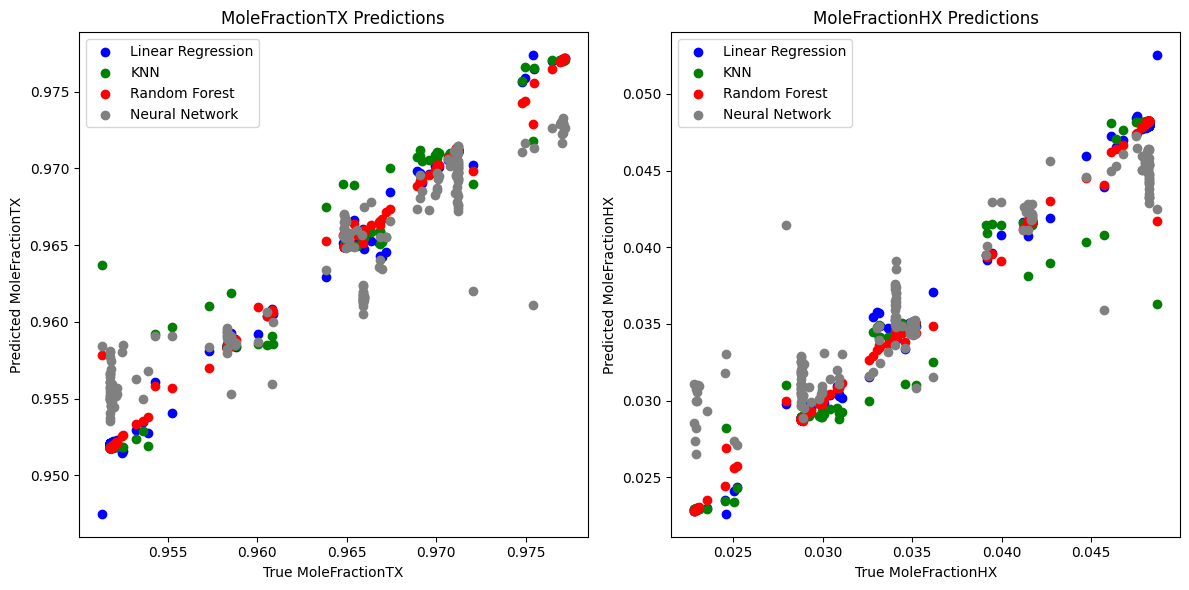

In [41]:
# Plot results for MoleFractionTX
plt.figure(figsize=(12, 6))

# Add Neural Network predictions for MoleFractionTX
plt.subplot(1, 2, 1)
plt.scatter(y_TX_test, y_TX_pred_lin, color='blue', label='Linear Regression')
plt.scatter(y_TX_test, y_TX_pred_knn, color='green', label='KNN')
plt.scatter(y_TX_test, y_TX_pred_rf, color='red', label='Random Forest')
plt.scatter(y_TX_test, y_tx_pred, color='gray', label='Neural Network')
plt.xlabel('True MoleFractionTX')
plt.ylabel('Predicted MoleFractionTX')
plt.title('MoleFractionTX Predictions')
plt.legend()

# Plot results for MoleFractionHX
plt.subplot(1, 2, 2)
plt.scatter(y_HX_test, y_HX_pred_lin, color='blue', label='Linear Regression')
plt.scatter(y_HX_test, y_HX_pred_knn, color='green', label='KNN')
plt.scatter(y_HX_test, y_HX_pred_rf, color='red', label='Random Forest')
plt.scatter(y_HX_test, y_hx_pred, color='gray', label='Neural Network')
plt.xlabel('True MoleFractionHX')
plt.ylabel('Predicted MoleFractionHX')
plt.title('MoleFractionHX Predictions')
plt.legend()

plt.tight_layout()
plt.show()

**Model Interpretation and Prediction**

In [42]:
# Prediction function with feature matching
def predict_mole_fractions(new_data):
    # Ensure new_data matches the feature columns of the trained model
    new_data = new_data.reindex(columns=X.columns, fill_value=0)  # X.columns should be the columns used for training

    # Scale the data
    new_data_scaled = scaler.transform(new_data)

    # Use the best model for MoleFractionTX
    if best_model_TX == 'Linear Regression':
        mole_fraction_TX = lin_reg.predict(new_data_scaled)
    elif best_model_TX == 'K-Nearest Neighbors':
        mole_fraction_TX = knn.predict(new_data_scaled)
    else:
        mole_fraction_TX = rf.predict(new_data_scaled)

    # Use the best model for MoleFractionHX
    if best_model_HX == 'Linear Regression':
        mole_fraction_HX = lin_reg_HX.predict(new_data_scaled)
    elif best_model_HX == 'K-Nearest Neighbors':
        mole_fraction_HX = knn_HX.predict(new_data_scaled)
    else:
        mole_fraction_HX = rf_HX.predict(new_data_scaled)

    return {
        'MoleFractionTX': mole_fraction_TX,
        'MoleFractionHX': mole_fraction_HX
    }

# Example prediction
new_data = pd.DataFrame({
    'Liquid%inCondensor': [50],
    'Condenser_Pressure': [101],
    'Liquid%inReboiler': [50],
    'Mass_Flow_Rate_in_Feed_Flow': [37],
    'Mass_Flow_Rate_in_Top_outlet_stream': [6700],
    'Net_Mass_Flow_in_main_tower': [2750],
    'Feed_Tray_Temp': [77],
    'Main_Tower_Pressure': [101],
    'Reflux_Ratio': [0.8]
})

# Ensure all columns match the training data columns
predicted_mole_fractions = predict_mole_fractions(new_data)
print("Predicted Mole Fractions for New Data:", predicted_mole_fractions)


Predicted Mole Fractions for New Data: {'MoleFractionTX': array([0.95768515]), 'MoleFractionHX': array([0.04262738])}
